# New York City Taxi Trip Duration

Share code and data to improve ride time predictions

## Contents

1. EDA
  1. 데이터 확인
  1. Correlation 분석
      1. heatmap
      1. pairplot
      1. VIF
1. rough modeling
  - 결과 진단
      1. 잔차 정규성 검정
          - plot (residual - feature)
      1. 이분산 검정
          - scatter plot (residual - feature)
      1. 자기상관 검정
          - PCA 결정
      1. target-feature check
          1. partial regression plot
          1. ccpr plot
1. 컬럼별 최적 정규화
1. modeling
  1. model with outlier
  1. model w/o outlier
  1. 결과 진단
      1. 잔차 정규성 검정
      1. 이분산 검정
      1. 자기상관 검정
      1. target-feature check
1. Cross validation 결과
1. Kaggle 결과
1. 결론

---

In [1]:
from taxi_pakage import *
from encoding_data import *

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# 추가로 필요한 함수 (지도)
from ipyleaflet import *
import time

---

# 1. EDA

## 1.1 Data Check

In [3]:
# data set
taxi = pd.read_csv('train.csv')
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [4]:
# 데이터 크기
taxi.shape # 1,458,644개 데이터, 11개의 컬럼으로 구성

(1458644, 11)

In [5]:
# 데이터에 대한 정보 (컬럼 개수, null값 여부, 데이터 유형)
taxi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- object : id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
- int : vendor_id, passenger_count, trip_duration
- float : pickup_logitude, pickup_latitude, dropoff_logitude, dropoff_latitude

| Values | Meaning |
|-|-|
|id | a unique identifier for each trip |
|vendor_id | a code indicating the provider associated with the trip record |
|pickup_datetime|date and time when the meter was engaged |
|dropoff_datetime|date and time when the meter was disengaged|
|passenger_count|the number of passengers in the vehicle (driver entered value)|
|pickup_longitude|the longitude where the meter was engaged|
|pickup_latitude| the latitude where the meter was engaged|
|dropoff_longitude| the longitude where the meter was disngaged|
|dropoff_latitude| the latitude where the meter was disengaged|
|store_and_fwd_flag|This indicates whether the trip record was held in vehicle memory |
|trip_duration|duration of the trip in seconds|

In [6]:
# Descriptive statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x)
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


## 1.2 독립 변수

### 1.2.1 카테고리 변수 
( vendor_id / passenger_count / store_and_fwd_flag )

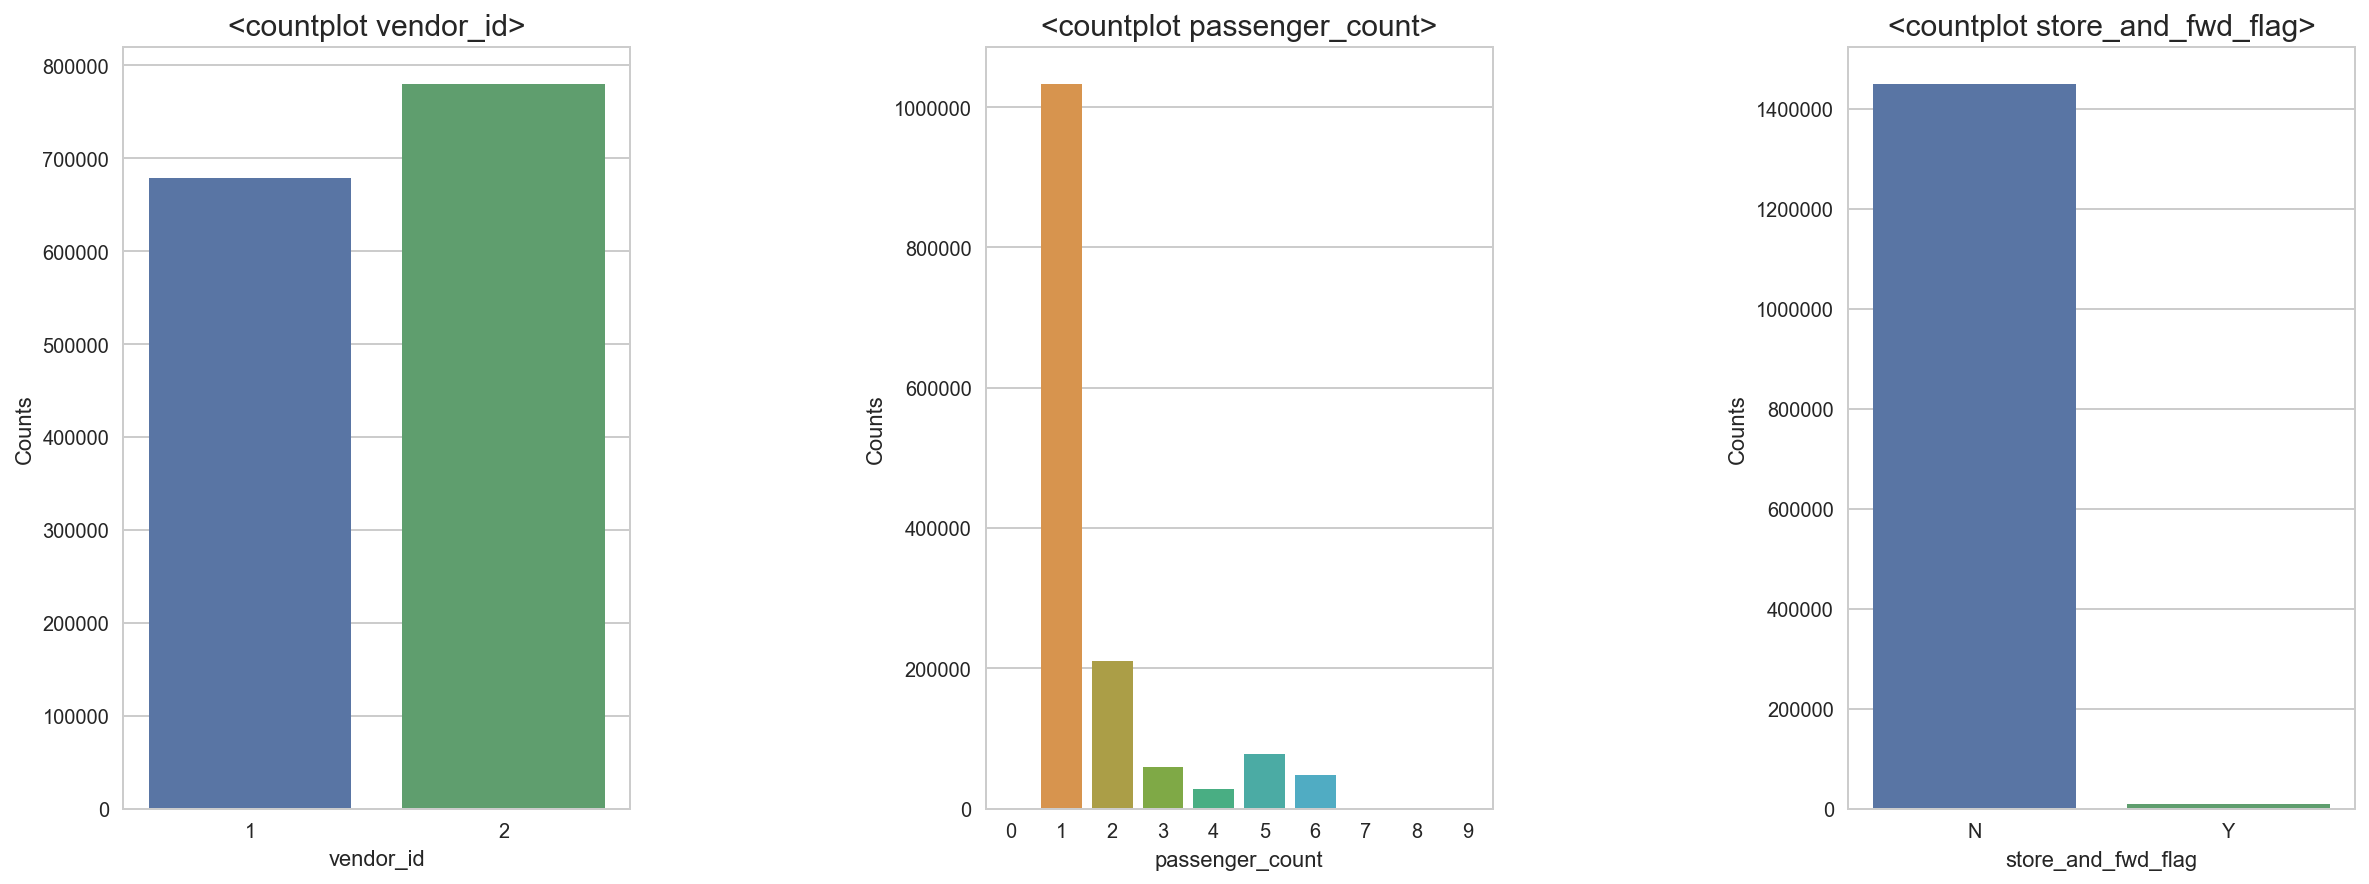

In [7]:
# countplot
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.countplot(x = 'vendor_id', data = taxi)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('Counts')

# passenger_count
plt.subplot(132)
sns.countplot(x = 'passenger_count', data = taxi)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(x = 'store_and_fwd_flag', data = taxi)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Counts')

plt.show()

### 1.2.2 좌표 변수 
( pickup_longitude / pickup_latitude / dropoff_longitude / dropoff_latitude )

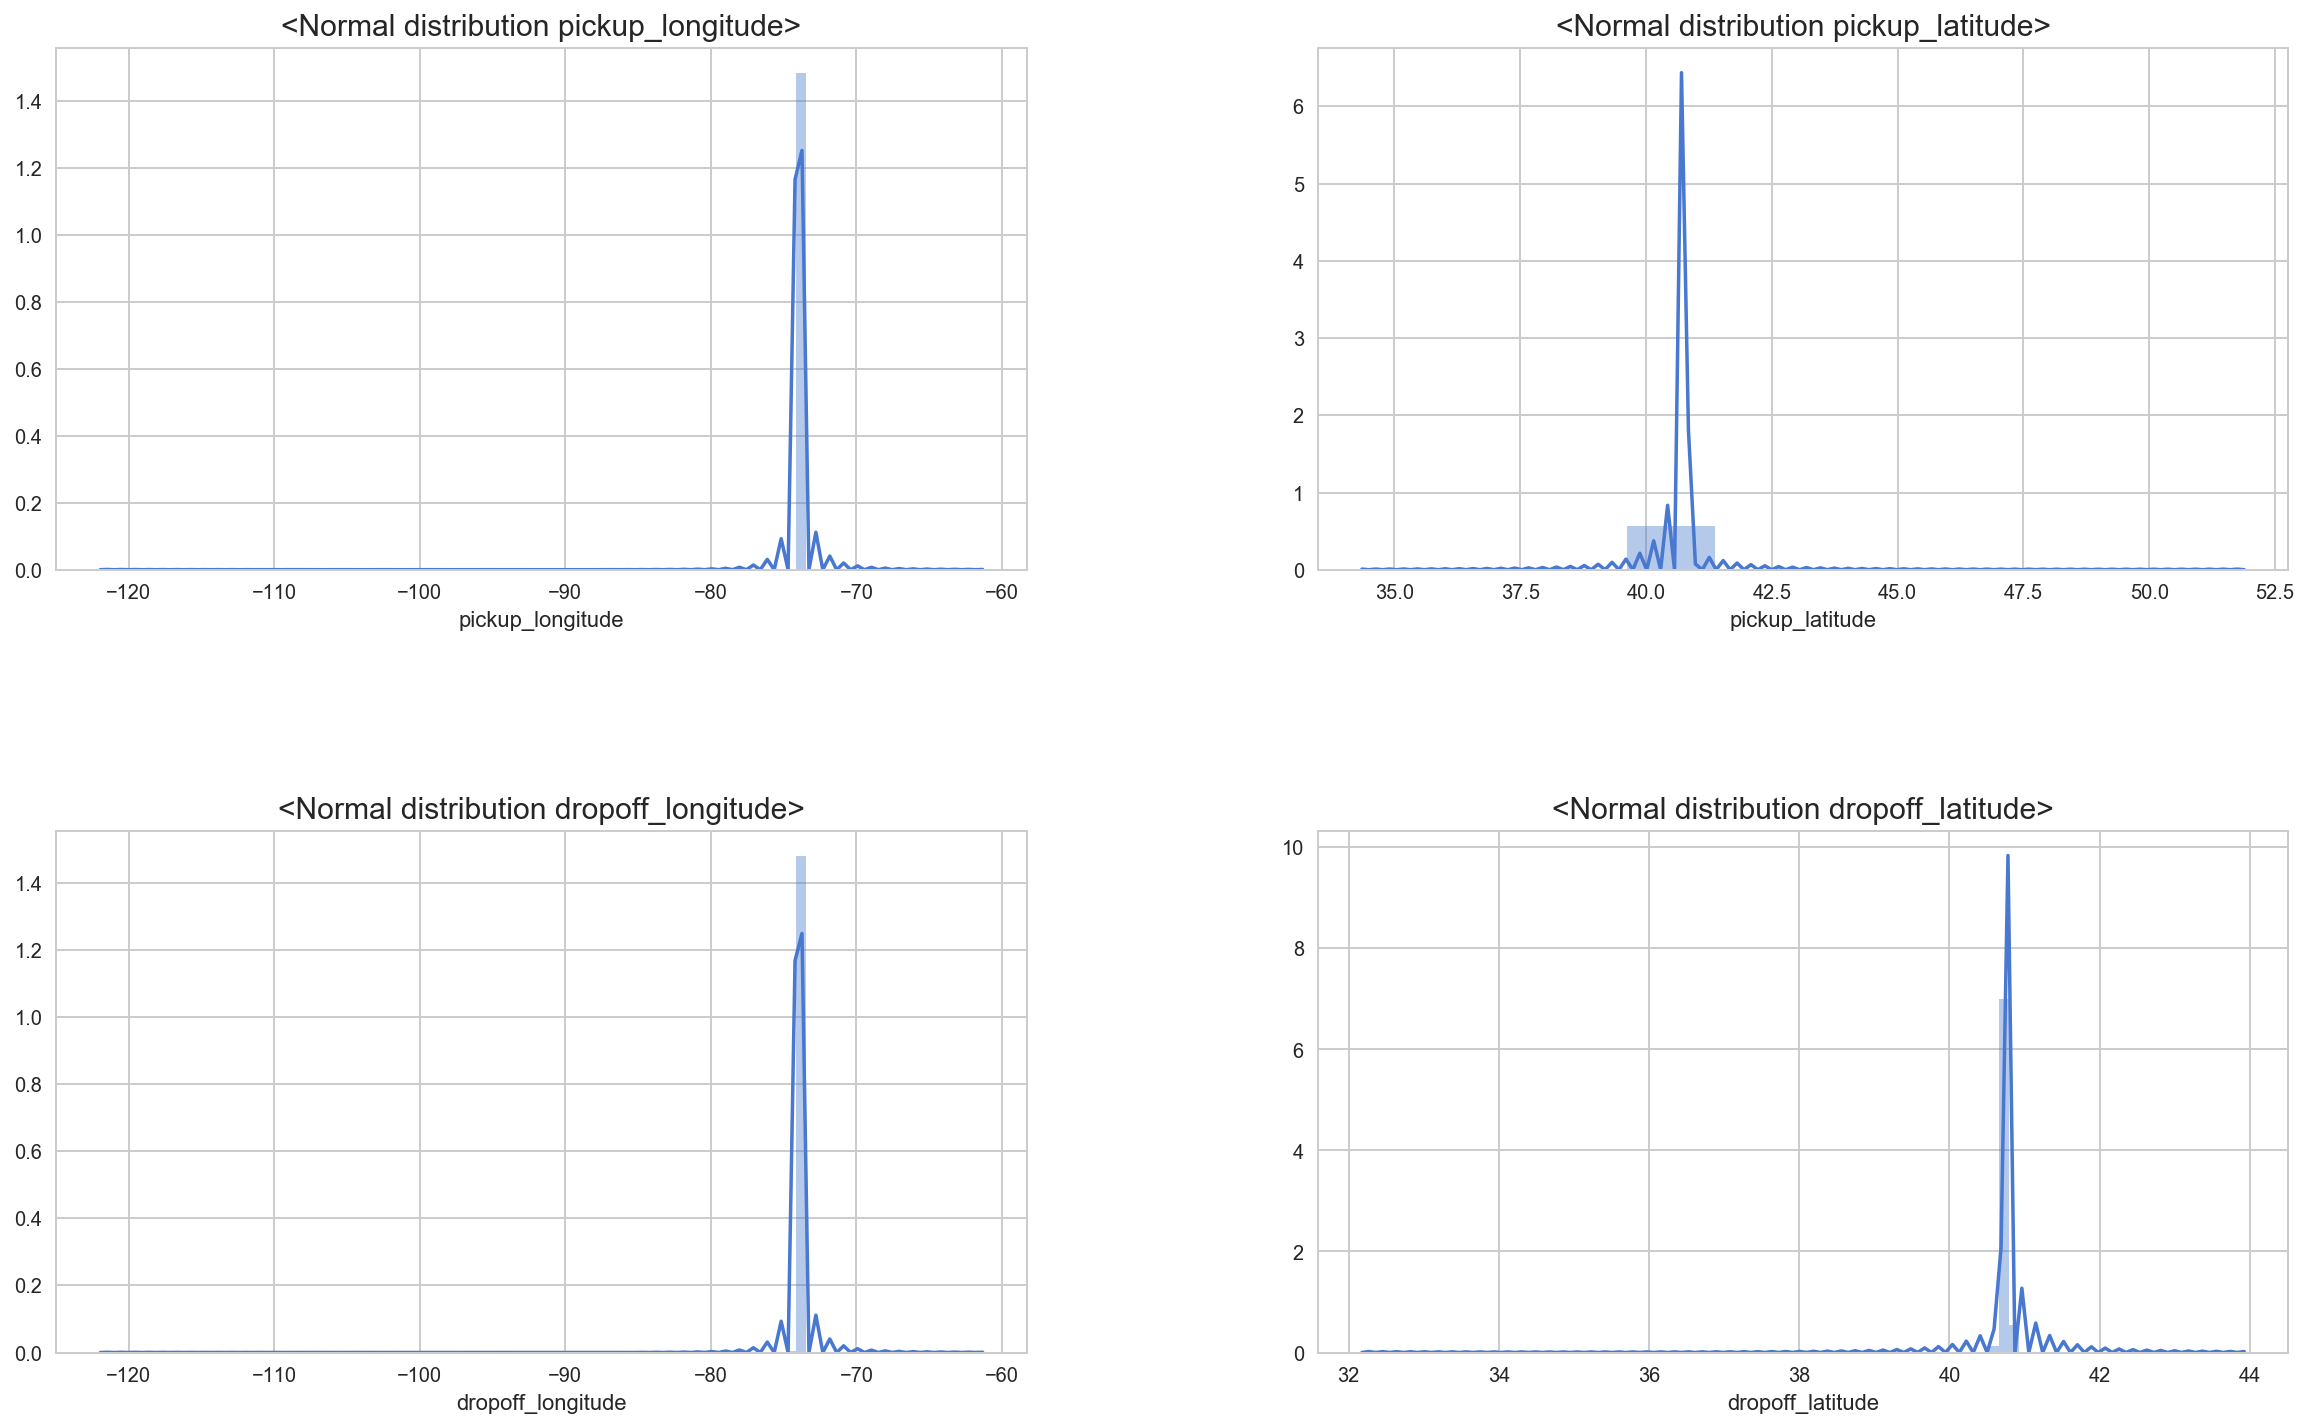

In [8]:
# normal distribution
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(221)
plt.title("<Normal distribution pickup_longitude>", fontsize = 15)
sns.distplot(taxi["pickup_longitude"].values, 
             axlabel = "pickup_longitude", bins = 90, color = "b")


# pickup_latitude
plt.subplot(222)
plt.title("<Normal distribution pickup_latitude>", fontsize = 15)
sns.distplot(taxi["pickup_latitude"].values, 
             axlabel = "pickup_latitude", bins = 10, color = "b")

# dropoff_longitude
plt.subplot(223)
plt.title("<Normal distribution dropoff_longitude>", fontsize = 15)
sns.distplot(taxi["dropoff_longitude"].values, 
             axlabel = "dropoff_longitude", bins = 90, color = "b")

# dropoff_latitude
plt.subplot(224)
plt.title("<Normal distribution dropoff_latitude>", fontsize = 15)
sns.distplot(taxi["dropoff_latitude"].values, 
             axlabel = "dropoff_latitude", bins = 90, color = "b")

plt.show()

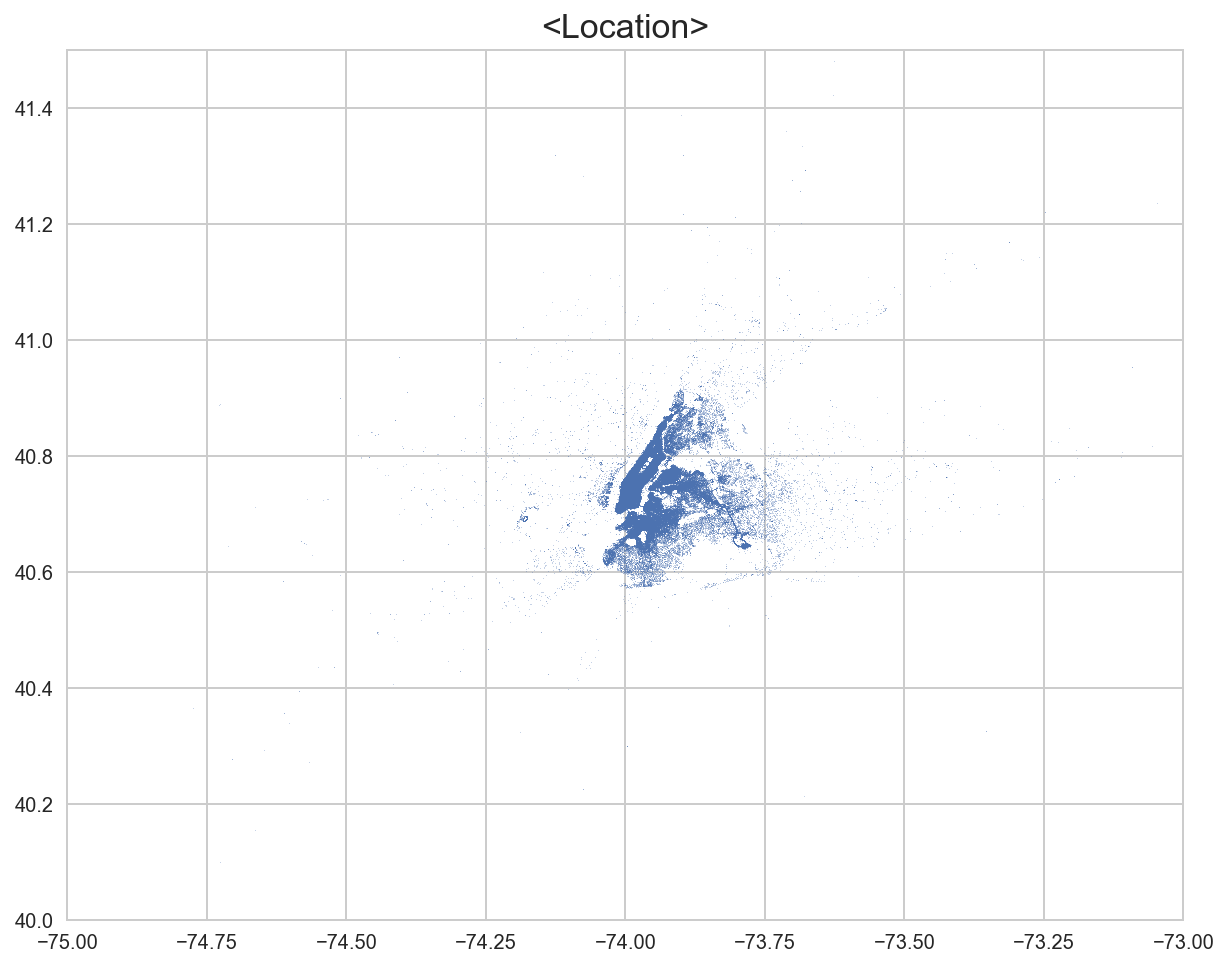

In [9]:
# 좌표 표시
longitude = list(taxi['pickup_longitude']) + list(taxi['dropoff_longitude'])
latitude = list(taxi['pickup_latitude']) + list(taxi['dropoff_latitude'])
plt.figure(figsize = (10, 8))
plt.xlim(-75, -73)
plt.ylim(40, 41.5)
plt.title("<Location>", fontsize = 17)
plt.plot(longitude, latitude, '.', alpha = 0.4, markersize = 1)
plt.show()

## 1.3 종속 변수

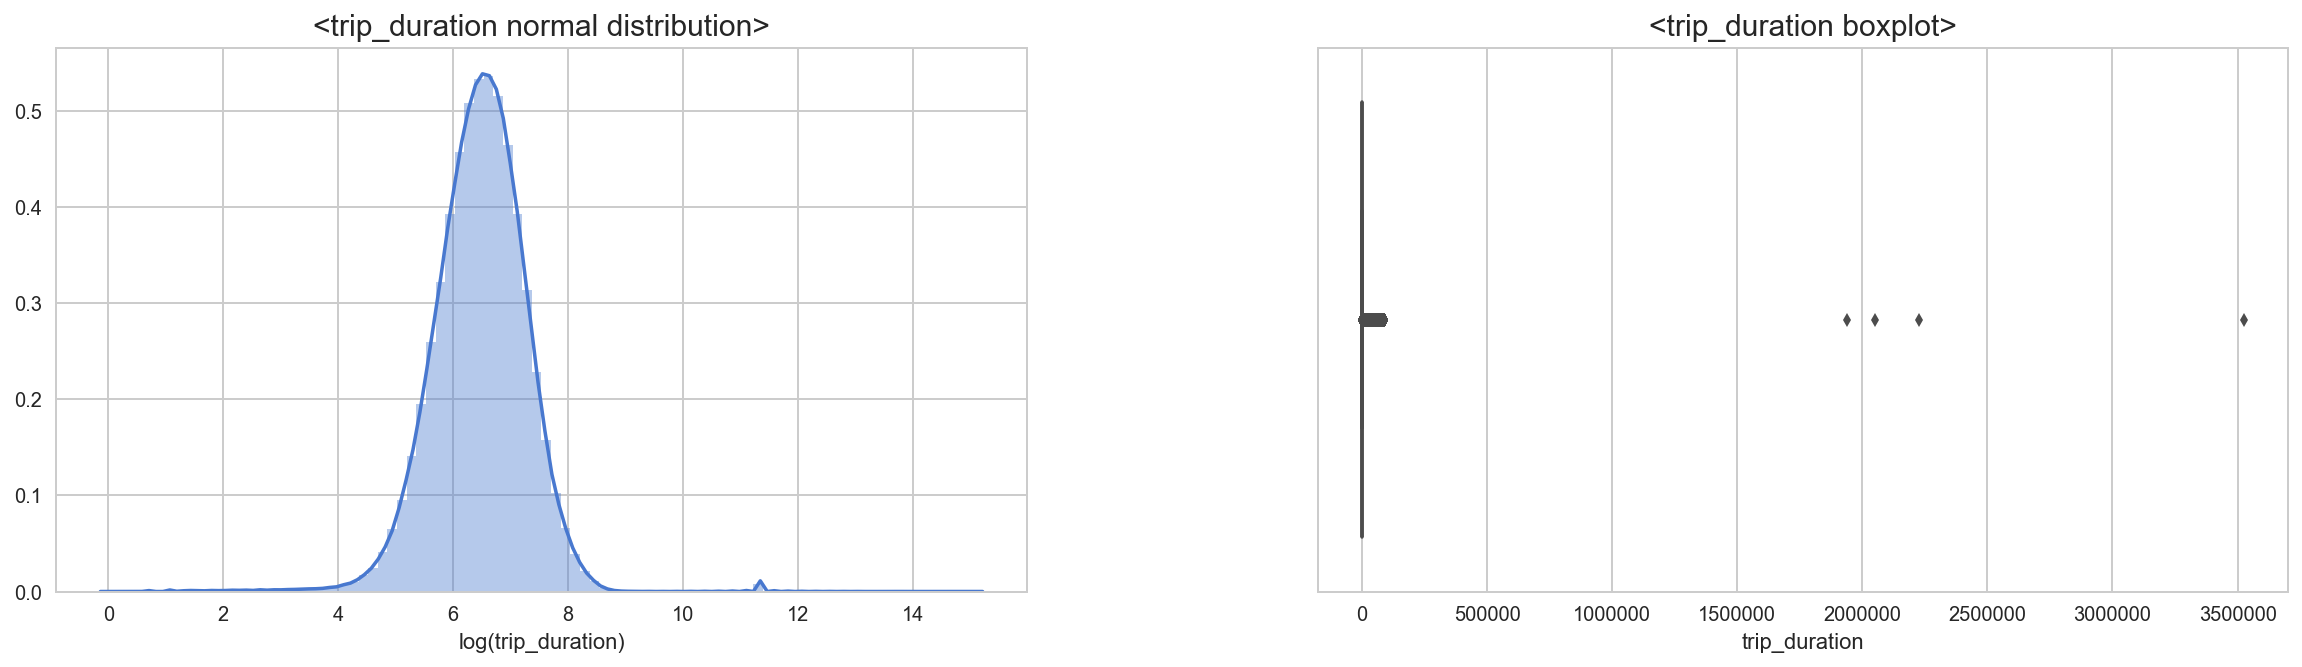

In [10]:
# trip_duration
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

plt.subplot(121)
plt.title("<trip_duration normal distribution>", fontsize = 15)
sns.distplot(np.log(taxi["trip_duration"]).values, 
             axlabel = "log(trip_duration)", label = "trip_duration", bins = 90, color = "b")

plt.subplot(122)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('<trip_duration boxplot>', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

## 1.4 Data edit / add

### 1.4.1 Data edit

In [11]:
# store_and_fwd_flag -  N, Y 를 0, 1 숫자로 변경
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# pickup_datetime, dropoff_datetime 형식 바꿈 (2016.01.01 기준)
taxi['pickup_datetime'] = taxi['pickup_datetime'].apply(strptime)
taxi['dropoff_datetime'] = taxi['dropoff_datetime'].apply(strptime)

### 1.4.2 Data add

In [12]:
# 좌표를 이용해 거리 생성
taxi['dist'] = haversine_np(taxi['pickup_longitude'], taxi['pickup_latitude'], 
                            taxi['dropoff_longitude'], taxi['dropoff_latitude'])

# date 숫자화
taxi['pick_date'] = taxi['pickup_datetime'].apply(date_to_zero)
taxi['pick_time'] = taxi['pickup_datetime'].apply(time_to_zero)
taxi['drop_time'] = taxi['dropoff_datetime'].apply(time_to_zero)

# date 카테고리화
taxi["pickup_datetime"] = pd.to_datetime(taxi["pickup_datetime"]) 
taxi["month"] = taxi["pickup_datetime"].dt.month # 월
taxi["hour"] = taxi["pickup_datetime"].dt.hour # 시간
taxi["weekday"] = taxi["pickup_datetime"].dt.weekday # 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
taxi['holiday'] = taxi['pickup_datetime'].apply(holiday) # 휴일 (휴일 X:1, 휴일 O:2)

In [13]:
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,pick_date,pick_time,drop_time,month,hour,weekday,holiday
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,0,778,1.22,98,48663,49441,4,13,4,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,0,655,6.05,9,27314,27969,1,7,6,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,0,764,7.82,112,25060,25824,4,6,4,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,0,373,1.09,4,57385,57758,1,15,1,0
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,0,198,1.13,95,53064,53262,4,14,1,0


### 1.4.3 Data set

In [14]:
# 최종 데이터
# 차후 분석을 위해 연속형 데이터, 카테고리 데이터, y(trip_duration)순으로 재배치
c_1 = taxi['vendor_id']
c_2 = taxi['passenger_count']
c_3 = taxi['store_and_fwd_flag']
c_4 = taxi['month']
c_5 = taxi['hour']
c_6 = taxi['weekday']
c_7 = taxi['holiday']
y = taxi['trip_duration'] 

taxi = taxi.drop(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count' , 'store_and_fwd_flag',  'trip_duration', 'month', 'hour', 'weekday', 'holiday'], axis = 1)

taxi['vendor_id'] = c_1
taxi['passenger_count'] = c_2
taxi['store_and_fwd_flag'] = c_3 
taxi['month'] = c_4 
taxi['hour'] = c_5 
taxi['weekday'] = c_6 
taxi['holiday'] = c_7 
taxi['trip_duration'] = y
taxi.tail()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,vendor_id,passenger_count,store_and_fwd_flag,month,hour,weekday,holiday,trip_duration
1458639,-73.98,40.75,-73.99,40.74,1.22,98,48663,49441,2,4,0,4,13,4,0,778
1458640,-74.00,40.75,-73.97,40.80,6.05,9,27314,27969,1,1,0,1,7,6,0,655
1458641,-73.96,40.77,-74.00,40.71,7.82,112,25060,25824,2,1,0,4,6,4,0,764
1458642,-73.98,40.75,-73.97,40.76,1.09,4,57385,57758,1,1,0,1,15,1,0,373
1458643,-73.98,40.78,-73.97,40.79,1.13,95,53064,53262,1,1,0,4,14,1,0,198


In [15]:
taxi.to_csv('edit_taxi.csv', index = False)

## 1.5 Correlation

In [16]:
# Trip_duration에서 6시간 이상 데이터 제거
taxi_EDA = taxi[taxi['trip_duration'] < 21600].reset_index(drop=True) 

### 1.5.1 countplot ( with trip_duration )

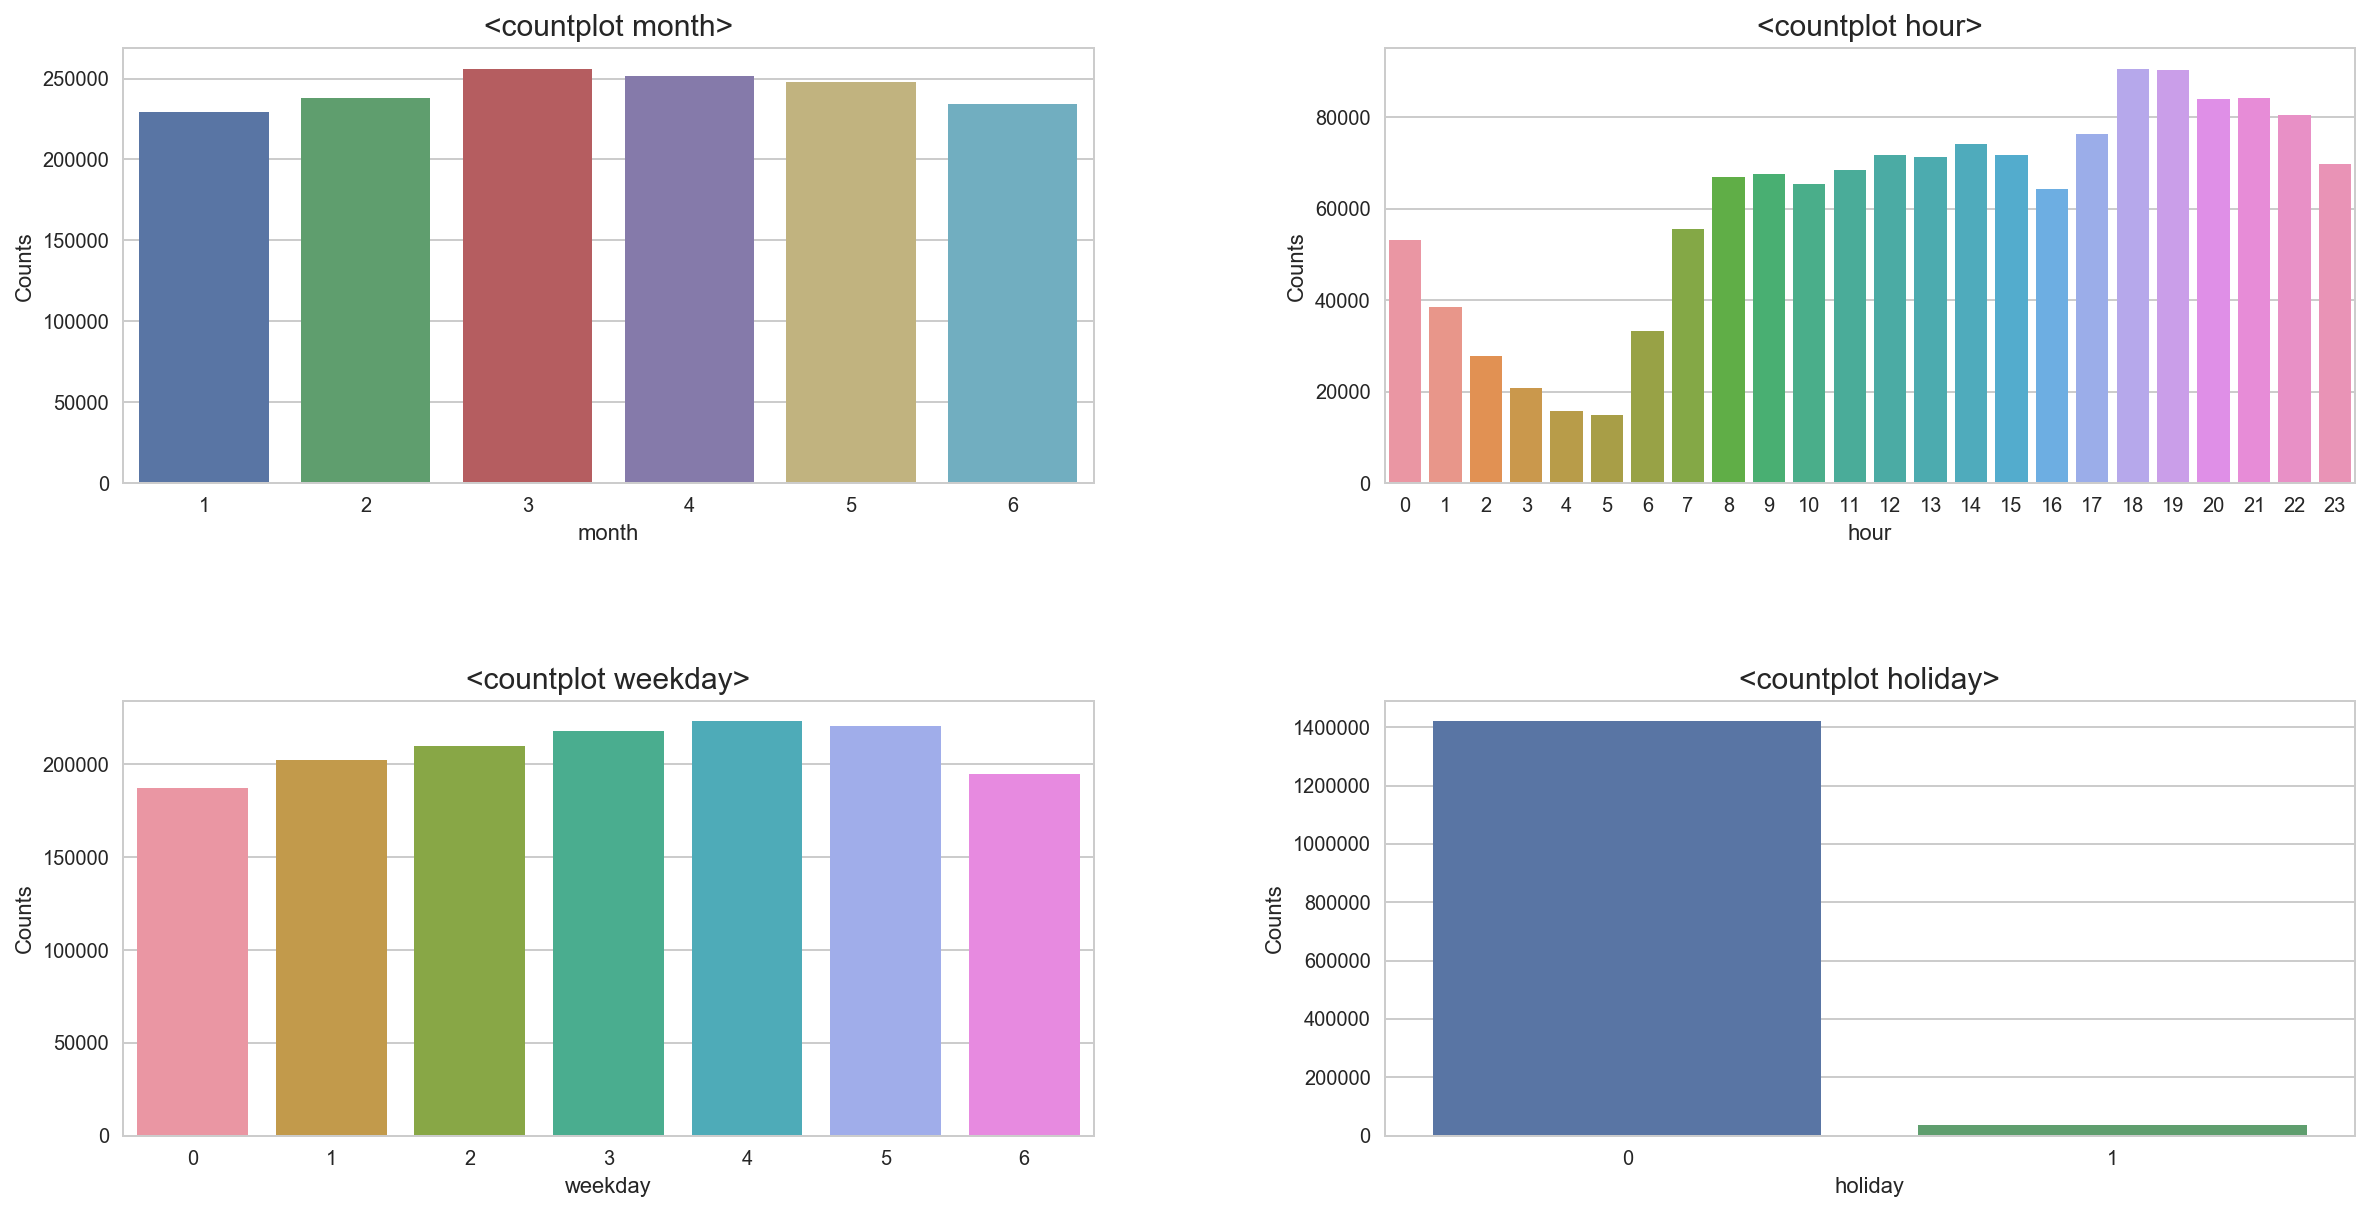

In [25]:
# countplot
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

# vendor_id
plt.subplot(221)
sns.countplot(x = 'month', data = taxi_EDA)
plt.title('<countplot month>', fontsize = 15)
plt.xlabel('month')
plt.ylabel('Counts')

# passenger_count
plt.subplot(222)
sns.countplot(x = 'hour', data = taxi_EDA)
plt.title('<countplot hour>', fontsize = 15)
plt.xlabel('hour')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(223)
sns.countplot(x = 'weekday', data = taxi_EDA)
plt.title('<countplot weekday>', fontsize = 15)
plt.xlabel('weekday')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(224)
sns.countplot(x = 'holiday', data = taxi_EDA)
plt.title('<countplot holiday>', fontsize = 15)
plt.xlabel('holiday')
plt.ylabel('Counts')

plt.show()

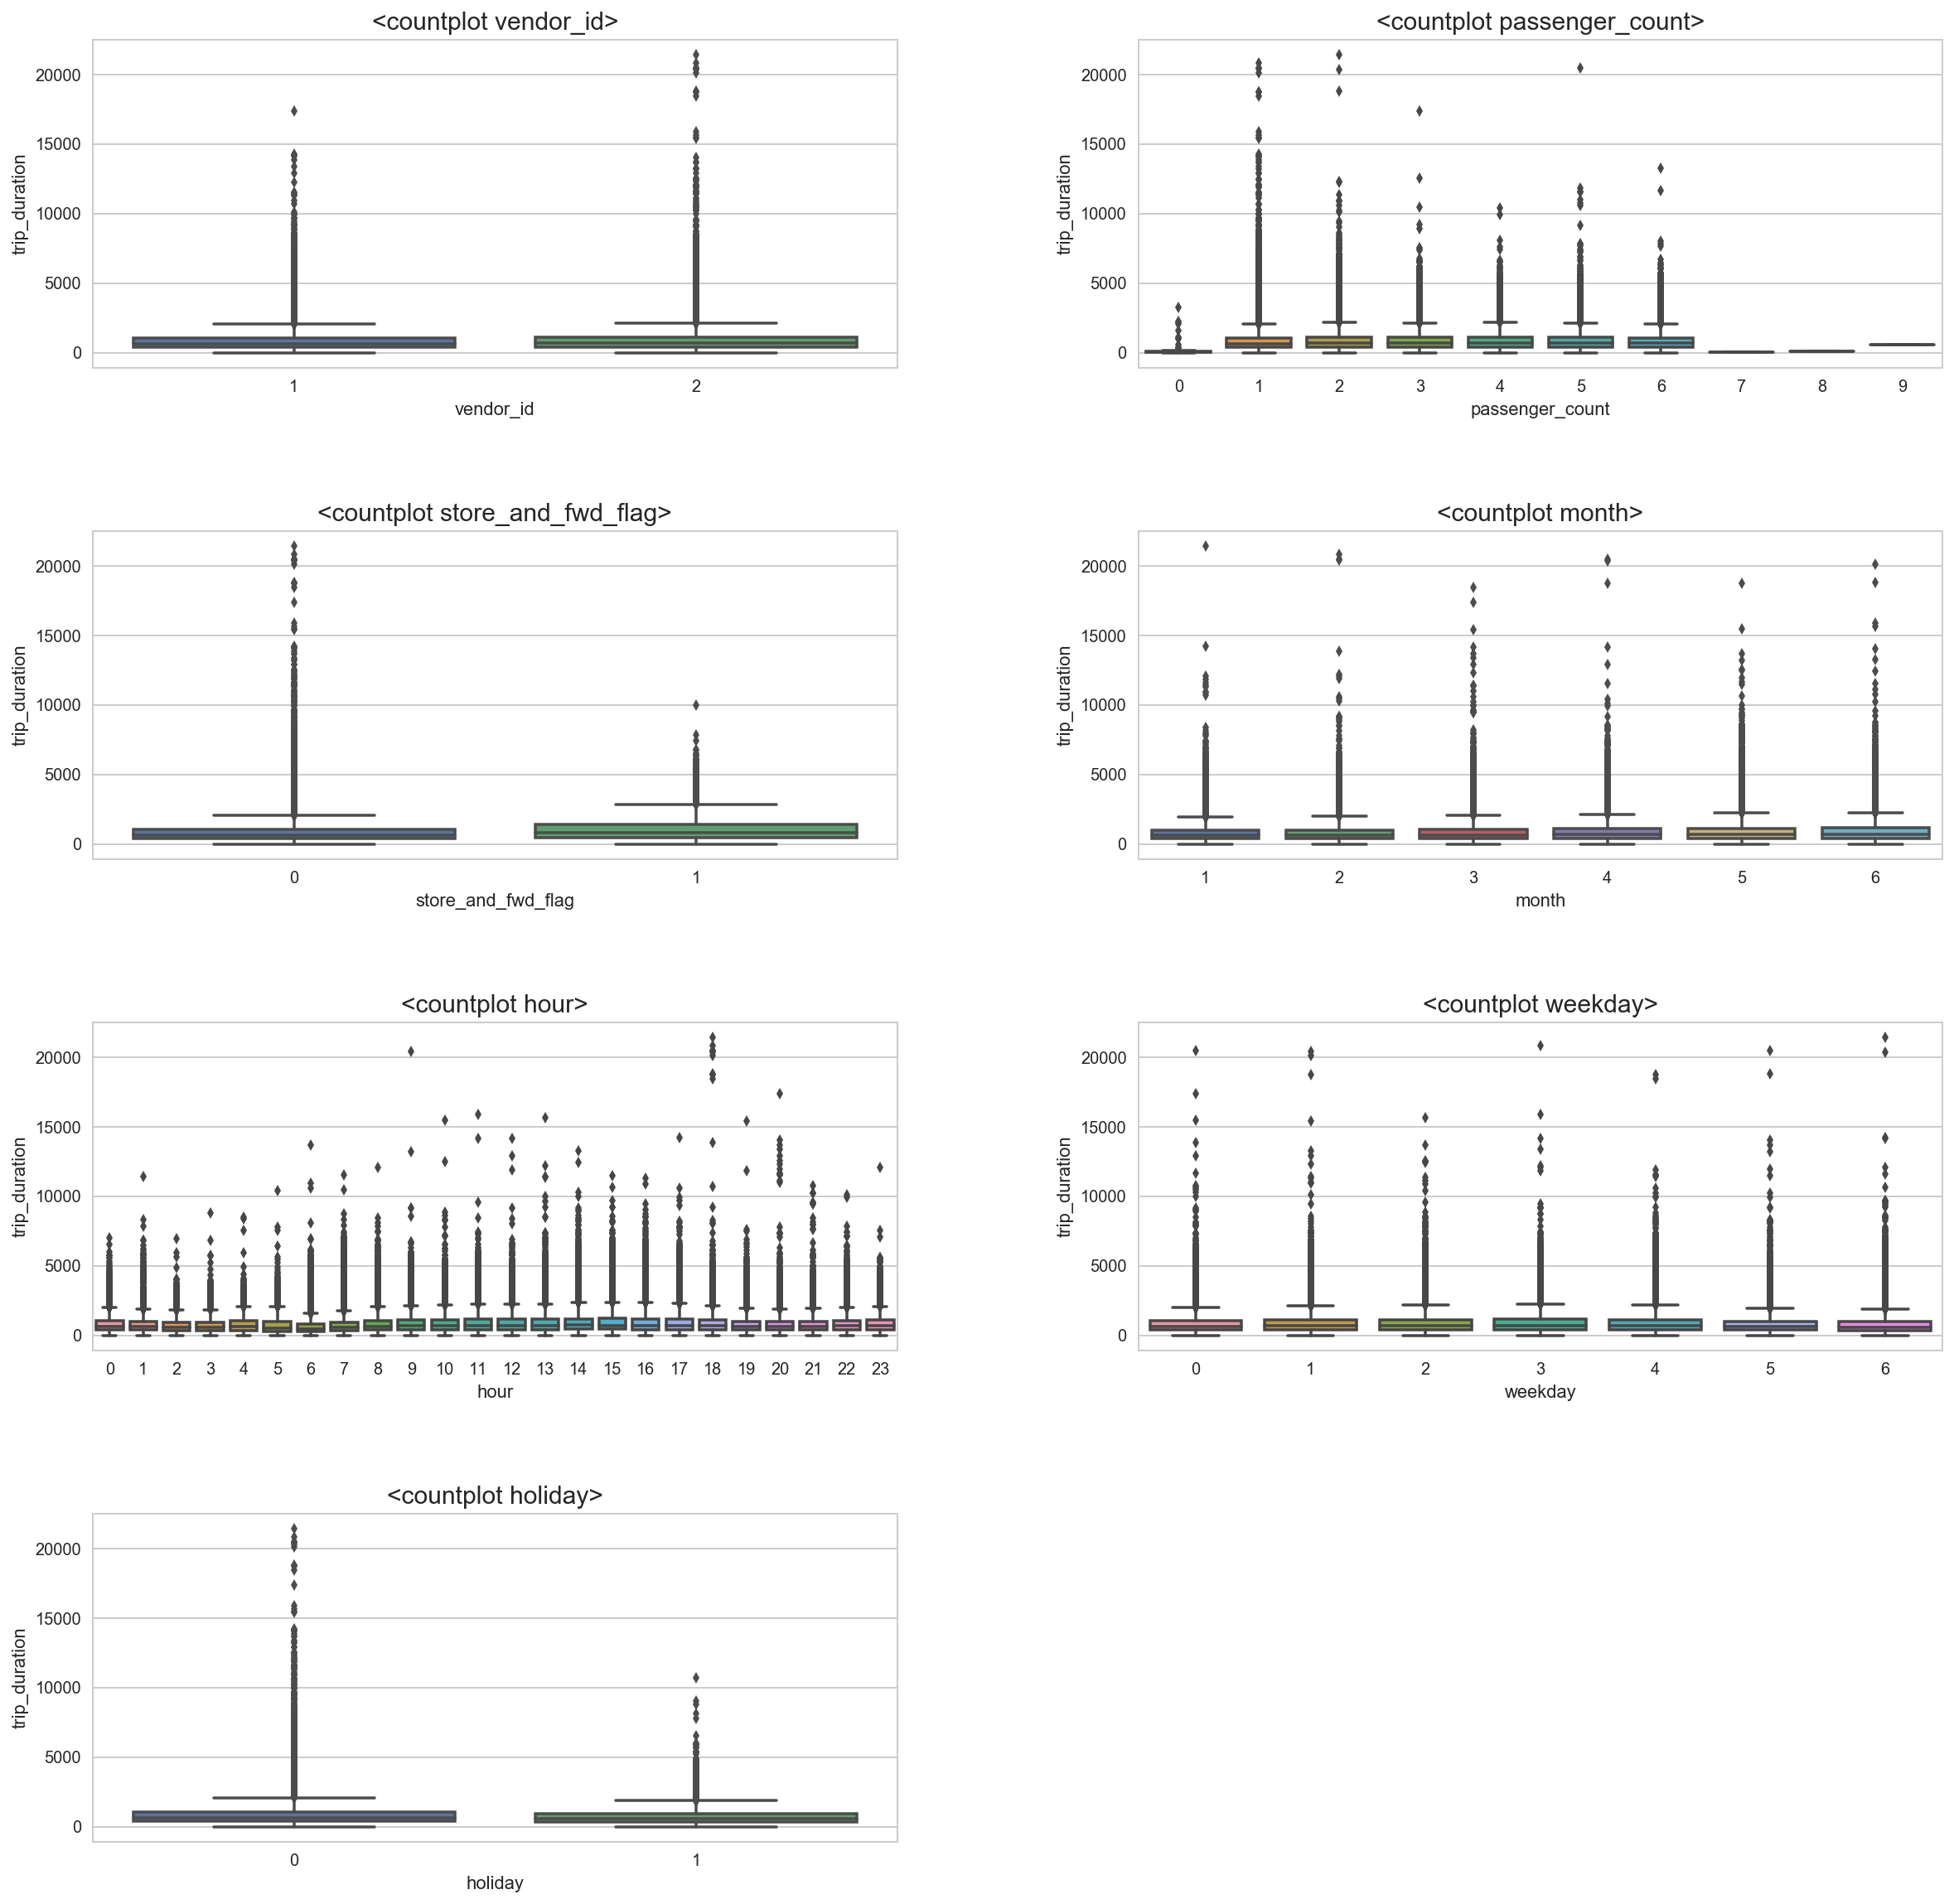

In [17]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

# vendor_id
plt.subplot(421)
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('trip_duration')

# passenger_count
plt.subplot(422)
sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

# store_and_fwd_flag
plt.subplot(423)
sns.boxplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')

# month
plt.subplot(424)
sns.boxplot(x = 'month', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot month>', fontsize = 15)
plt.xlabel('month')
plt.ylabel('trip_duration')

# hour
plt.subplot(425)
sns.boxplot(x = 'hour', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot hour>', fontsize = 15)
plt.xlabel('hour')
plt.ylabel('trip_duration')

# weekday
plt.subplot(426)
sns.boxplot(x = 'weekday', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot weekday>', fontsize = 15)
plt.xlabel('weekday')
plt.ylabel('trip_duration')

# holiday
plt.subplot(427)
sns.boxplot(x = 'holiday', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot holiday>', fontsize = 15)
plt.xlabel('holiday')
plt.ylabel('trip_duration')

plt.show()

### 1.5.2 heatmap

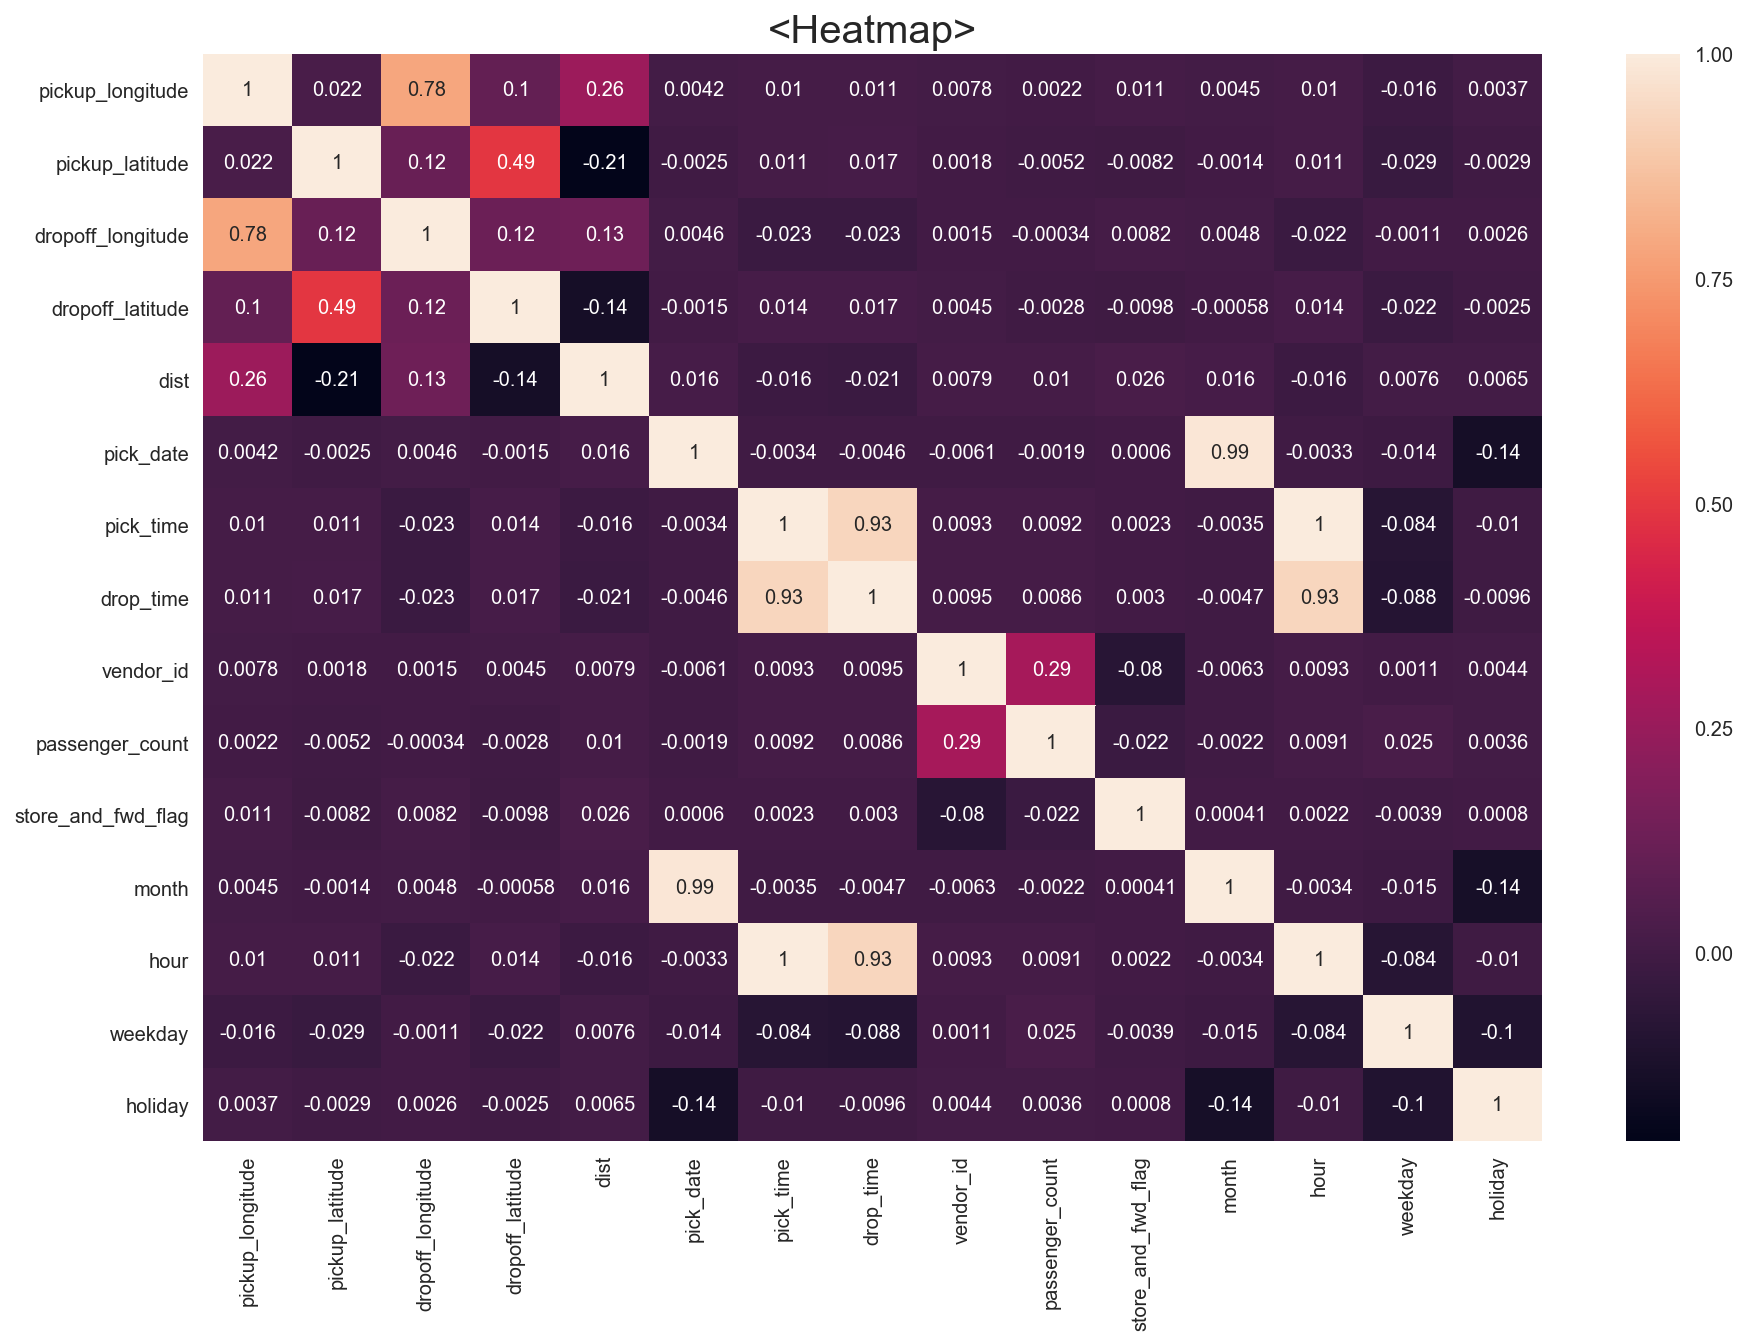

In [19]:
f, ax = plt.subplots(figsize=(15, 10))
taxi_heatmap = taxi_EDA.drop(['trip_duration'], axis = 1)
sns.heatmap(taxi_heatmap.corr(), annot=True)
plt.title("<Heatmap>", fontsize = 20)

plt.show()

### 1.5.3 pairplot

In [20]:
# 오래 걸려서 일단 패스
# taxi_pair = taxi_EDA.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pick_time', 'drop_time'], axis = 1)
# sns.pairplot(taxi_pair)

### 1.5.4 VIF ( Variance Inflation Factor )

In [21]:
taxi_vif = taxi_EDA.drop(['trip_duration'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_vif.values, i) for i in range(taxi_vif.shape[1])]
vif["features"] = taxi_vif.columns
vif

,VIF Factor,features
0,2939503.65,pickup_longitude
1,1683995.22,pickup_latitude
2,2741506.19,dropoff_longitude
3,1478381.17,dropoff_latitude
4,1.71,dist
5,144.13,pick_date
6,2672.45,pick_time
7,44.47,drop_time
8,11.47,vendor_id
9,2.84,passenger_count


In [26]:
taxi_EDA = taxi_EDA.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pick_time', 'hour'], axis = 1)
taxi_EDA.tail()

,dist,pick_date,drop_time,vendor_id,passenger_count,store_and_fwd_flag,month,weekday,holiday,trip_duration
1456578,1.22,98,49441,2,4,0,4,4,0,778
1456579,6.05,9,27969,1,1,0,1,6,0,655
1456580,7.82,112,25824,2,1,0,4,4,0,764
1456581,1.09,4,57758,1,1,0,1,1,0,373
1456582,1.13,95,53262,1,1,0,4,1,0,198


In [27]:
taxi_EDA.to_csv('edit_taxi1.csv', index = False)

---

# 2. Rough modeling

## 2.1 잔차 정규성 검정

In [75]:
# feature 변수 개수, 변수 목록을 보여줌
taxi = pd.read_csv("edit_taxi1.csv")
feature_n, features = get_features(taxi)
feature_n, features

(10,
 'dist + pick_date + drop_time + vendor_id + passenger_count + store_and_fwd_flag + month + weekday + holiday + trip_duration')

In [76]:
# 분석을 위한 데이터 셋팅 (intercept추가)
taxi_1 = dmatrix('{}'.format(features), taxi, return_type = 'dataframe')
taxi_1.tail()

,Intercept,dist,pick_date,drop_time,vendor_id,passenger_count,store_and_fwd_flag,month,weekday,holiday,trip_duration
1456578,1.00,1.22,98.00,49441.00,2.00,4.00,0.00,4.00,4.00,0.00,778.00
1456579,1.00,6.05,9.00,27969.00,1.00,1.00,0.00,1.00,6.00,0.00,655.00
1456580,1.00,7.82,112.00,25824.00,2.00,1.00,0.00,4.00,4.00,0.00,764.00
1456581,1.00,1.09,4.00,57758.00,1.00,1.00,0.00,1.00,1.00,0.00,373.00
1456582,1.00,1.13,95.00,53262.00,1.00,1.00,0.00,4.00,1.00,0.00,198.00


In [77]:
# 독립변수 X 생성
feature_n_1, features_1 = get_features(taxi_1, 1, -1) # Intercept, trip_duration 제거
feature_n_1, features_1

(9,
 'dist + pick_date + drop_time + vendor_id + passenger_count + store_and_fwd_flag + month + weekday + holiday')

In [78]:
# Modeling, summary
model_1 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_1), data = taxi_1)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.615e+05
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:04:41   Log-Likelihood:            -1.1027e+07
No. Observations:             1456583   AIC:                         2.205e+07
Df Residuals:                 1456573   BIC:                         2.205e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            373.2376      2.027    184.125      0.000     369.265     377.211
dist                 108.6188      0.091   1197.039      0.000     108.441     108.797
pick_date              0.5935      0.045     13.275      0.000       0.506       0.681
drop_time              0.0013   1.67e-05     79.975      0.000       0.001       0.001
vendor_id              2.3852      0.817      2.921      0.003       0.785       3.986
passenger_count        4.0829      0.309     13.201      0.000       3.477       4.689
store_and_fwd_flag    79.5399      5.267     15.101      0.000      69.216      89.863
month                 -0.3665      1.371     -0.267      0.789      -3.054       2.321
weekday              -12.5474      0.201    -62.391      0.000     -12.942     -12.153
holiday             -100.2090      2.534    -39.539      0.000    -105.176     -95.242
==============================================================================
Omnibus:                  3693426.385   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    2767142154539.100
Skew:                         -26.764   Prob(JB):                         0.00
Kurtosis:                    6755.119   Cond. No.                     7.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

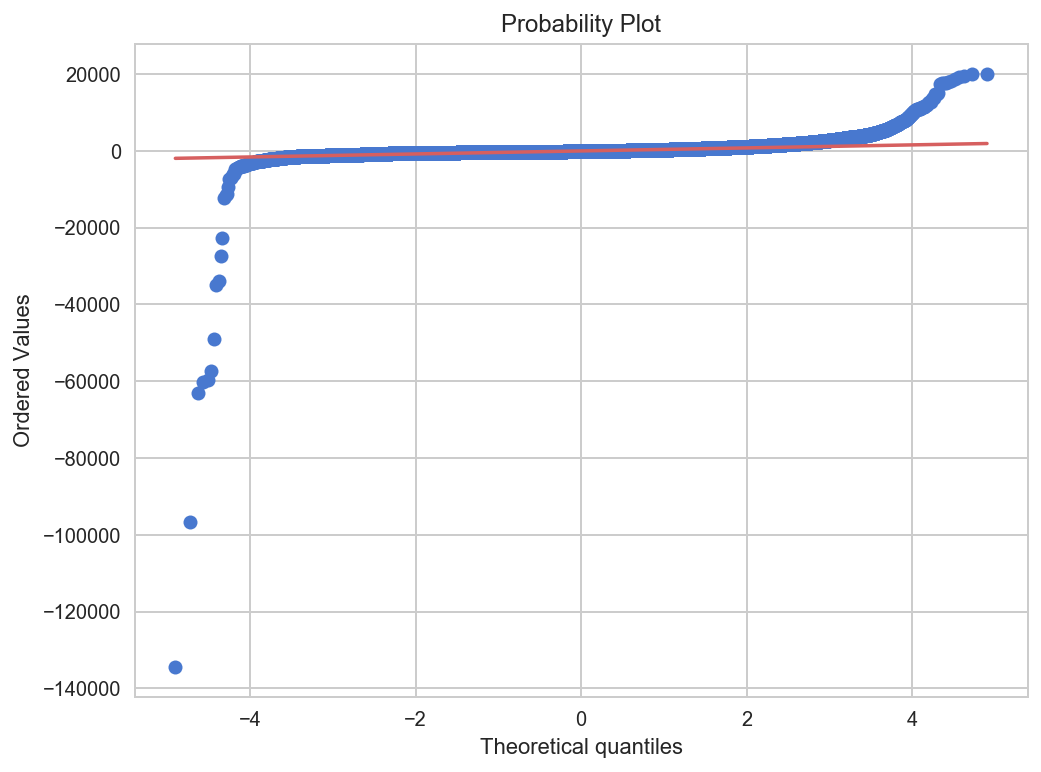

In [79]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_1.resid, plot = plt)
plt.show()

In [80]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 3693426.385
P-value     :  0.000


In [81]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_1.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 2767142154539.100
P-value     :  0.000
Skew        : -26.764
Kurtosis    : 6755.119


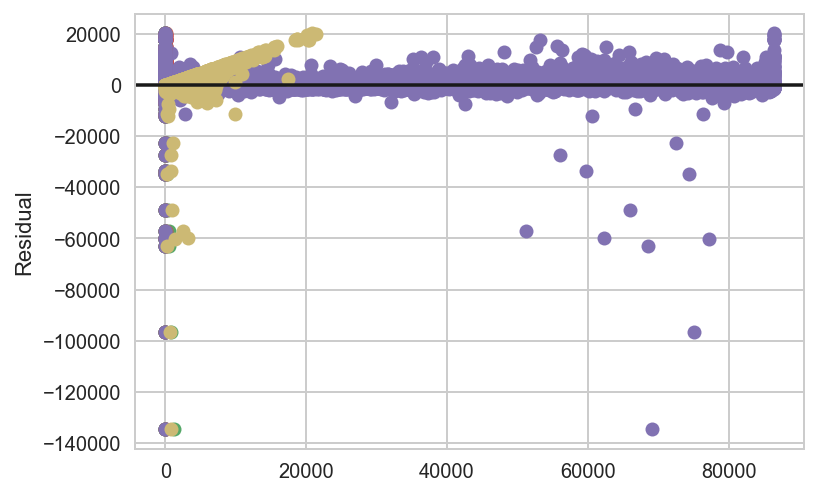

In [82]:
# x값에 따른 잔차의 분포 
plt.plot(taxi_1, result_1.resid, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.show()

## 2.2 이분산 검정

In [12]:
# 시간 오래걸려서 일단 생략
# plt.scatter(taxi, result_1.resid)
# plt.show()

## 2.3 자기상관 검정

### Durbin-Watson 검정

In [13]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1015.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:42:17   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458629   BIC:                         2.911e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.023e+05   8493.067     12.046      0.000    8.57e+04    1.19e+05
id                 -8.155e-06   3.74e-06     -2.182      0.029   -1.55e-05    -8.3e-07
pickup_longitude     -25.9003    101.892     -0.254      0.799    -225.605     173.804
pickup_latitude    -1369.3814    154.253     -8.877      0.000   -1671.712   -1067.051
dropoff_longitude    316.4521    100.094      3.162      0.002     120.271     512.634
dropoff_latitude    -606.9214    139.448     -4.352      0.000    -880.235    -333.608
dist                 112.0741      1.076    104.183      0.000     109.966     114.182
pick_date              0.4856      0.085      5.743      0.000       0.320       0.651
pick_time             -0.0046      0.001     -8.958      0.000      -0.006      -0.004
drop_time              0.0061      0.001     11.963      0.000       0.005       0.007
weekday               -3.7525      2.233     -1.681      0.093      -8.129       0.624
holiday             -107.8441     28.120     -3.835      0.000    -162.958     -52.730
vendor_id            199.8535      9.062     22.055      0.000     182.093     217.614
passenger_count        8.0735      3.430      2.354      0.019       1.351      14.796
store_and_fwd_flag    49.0105     58.482      0.838      0.402     -65.613     163.634
================================================================================
Omnibus:                  8314604.750   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2324412381811969.500
Skew:                         347.728   Prob(JB):                           0.00
Kurtosis:                  195565.153   Cond. No.                       4.55e+09
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2.4 Target-feature check

---

# 3. Optimal regulize

## 3.1 Leverage (레버리지)

In [14]:
# (시간이 걸려서 일단 패스)
# influence = result.get_influence()
# hat = influence.hat_matrix_diag

# plt.figure(figsize = (10, 2))
# plt.stem(hat)
# plt.show()

## 3.2 Outlier (아웃라이어)

In [83]:
taxi_2, drop = erase_outlier_np(result_1, taxi_1, feature_n, dropped=True)
len(taxi_1), len(drop)

(1456583, 57539)

In [84]:
feature_n_2, features_2 = get_features(taxi_1, 1, -8)
feature_n_2, features_2

(2, 'dist + pick_date')

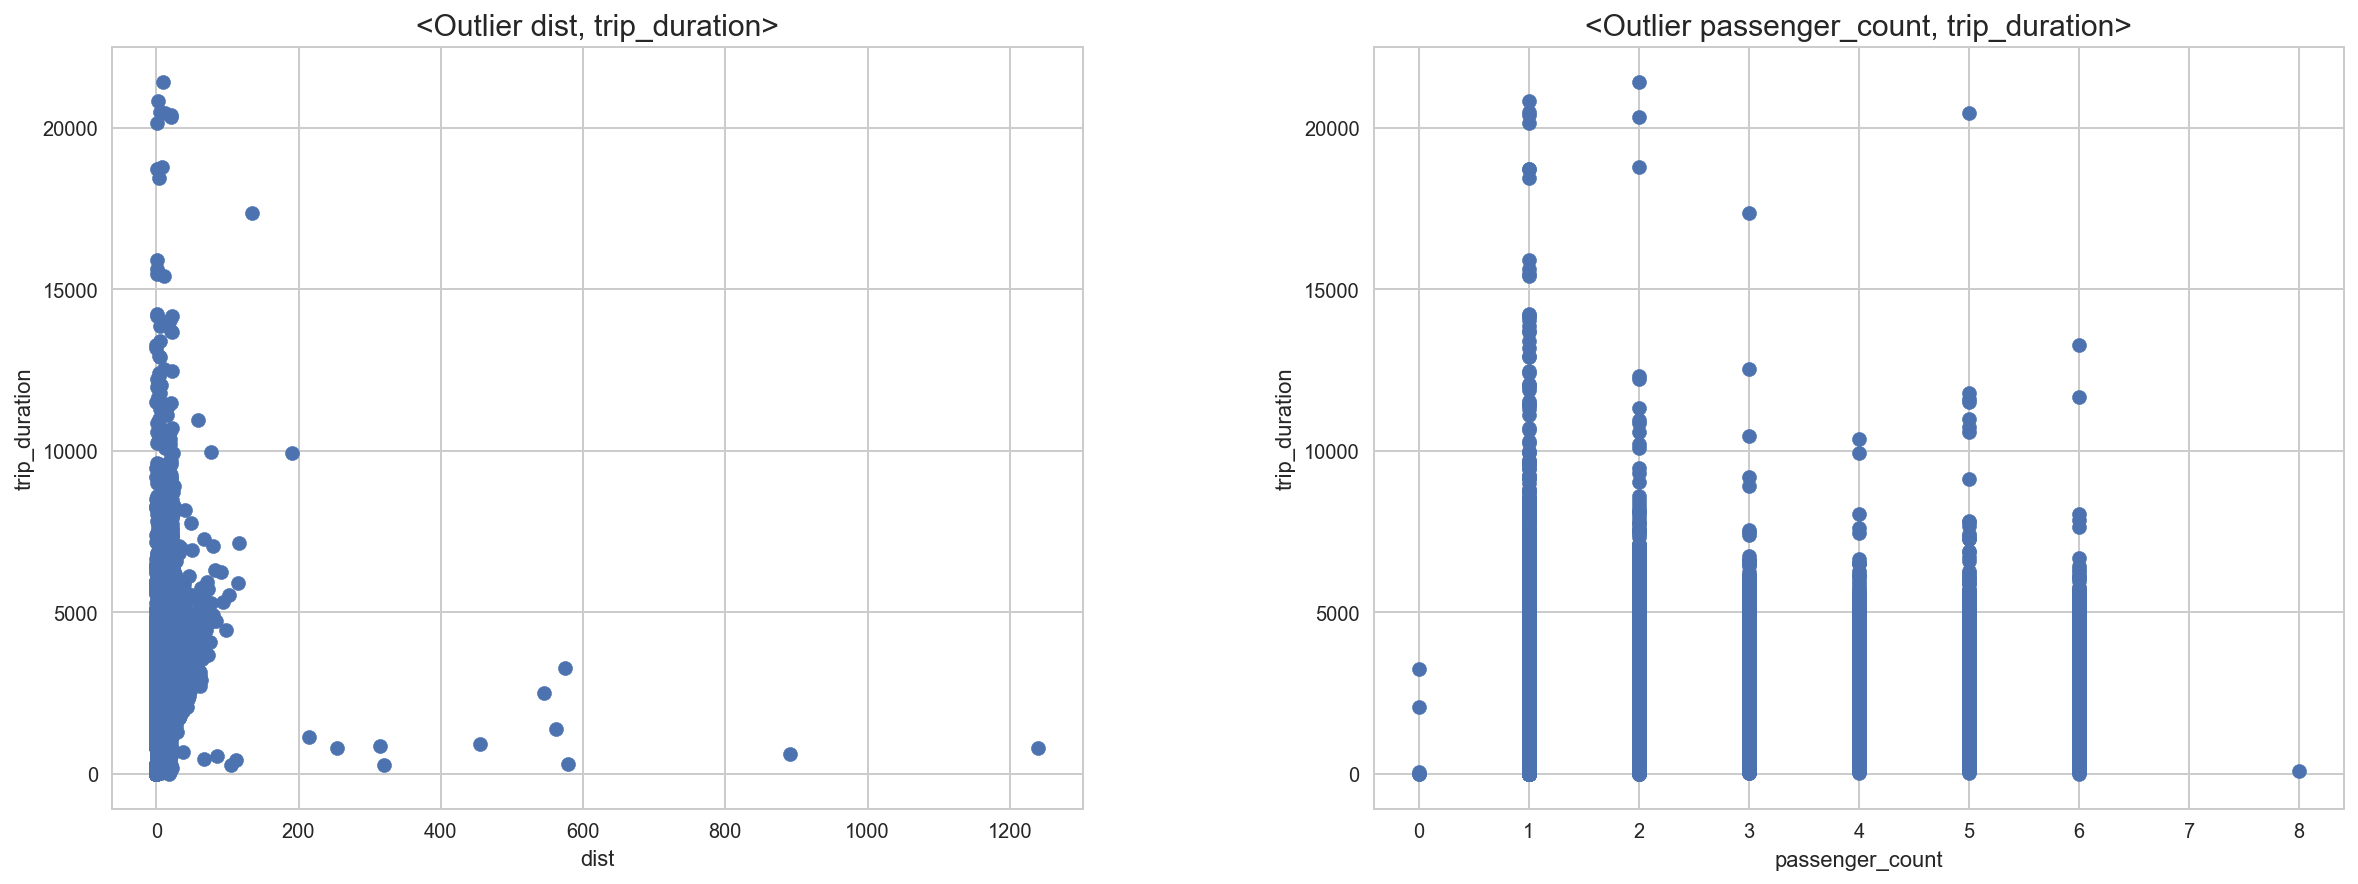

In [85]:
# Outlier
plt.figure(figsize = (20, 7))
plt.subplots_adjust(wspace = 0.3)

# outlier 제거 확인 (dist, trip_duration)
plt.subplot(121)
plt.scatter(drop['dist'], drop['trip_duration'])
plt.title('<Outlier dist, trip_duration>', fontsize = 15)
plt.xlabel('dist')
plt.ylabel('trip_duration')

# outlier 제거 확인 (passenger_count, trip_duration)
plt.subplot(122)
plt.scatter(drop['passenger_count'], drop['trip_duration'])
plt.title('<Outlier passenger_count, trip_duration>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

plt.show()

In [86]:
# 제거 후 결과
model_2 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_1), data = taxi_2)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                 2.656e+05
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:07:26   Log-Likelihood:            -1.0037e+07
No. Observations:             1399044   AIC:                         2.007e+07
Df Residuals:                 1399034   BIC:                         2.007e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            315.7913      1.398    225.821      0.000     313.050     318.532
dist                 126.9213      0.083   1537.350      0.000     126.760     127.083
pick_date              0.3348      0.031     10.900      0.000       0.275       0.395
drop_time              0.0012   1.15e-05    108.527      0.000       0.001       0.001
vendor_id             -0.5664      0.560     -1.012      0.311      -1.663       0.530
passenger_count       -0.7684      0.214     -3.591      0.000      -1.188      -0.349
store_and_fwd_flag    59.1726      5.778     10.242      0.000      47.849      70.497
month                  1.4062      0.942      1.492      0.136      -0.441       3.253
weekday              -11.0808      0.138    -80.242      0.000     -11.352     -10.810
holiday             -130.6540      1.827    -71.515      0.000    -134.235    -127.073
==============================================================================
Omnibus:                   192165.756   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           322919.533
Skew:                           0.931   Prob(JB):                         0.00
Kurtosis:                       4.440   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

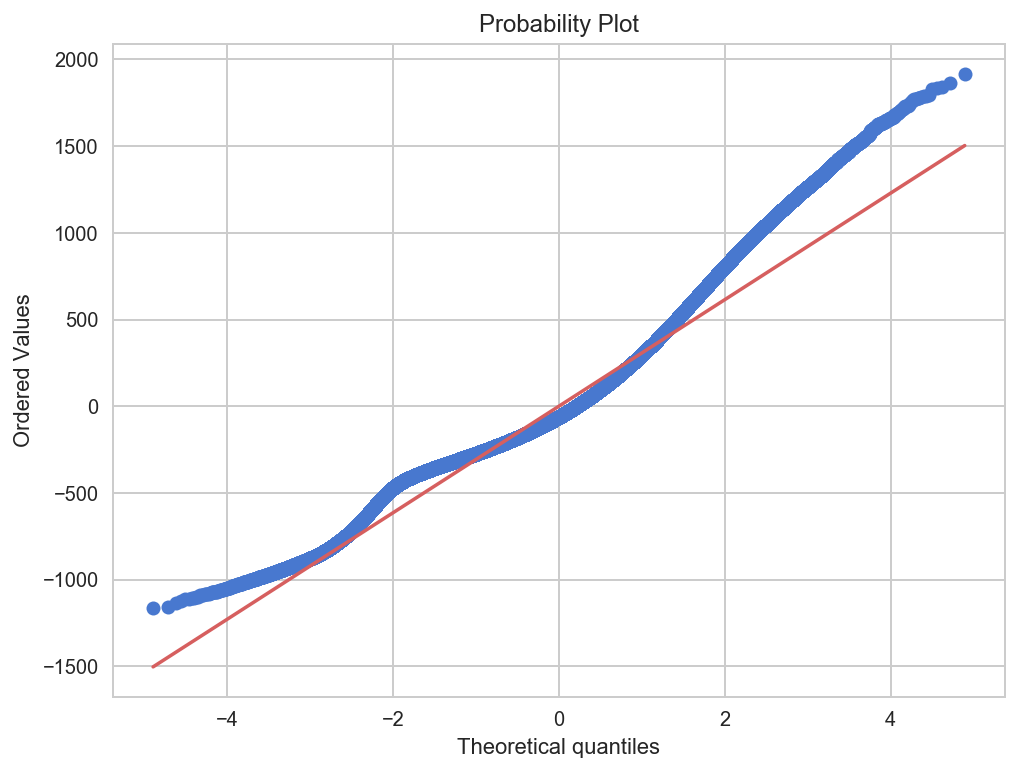

In [97]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_2.resid, plot = plt)
plt.show()

In [98]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_2.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 192165.756
P-value     :  0.000


In [99]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_2.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 322919.533
P-value     :  0.000
Skew        :  0.931
Kurtosis    :  4.440


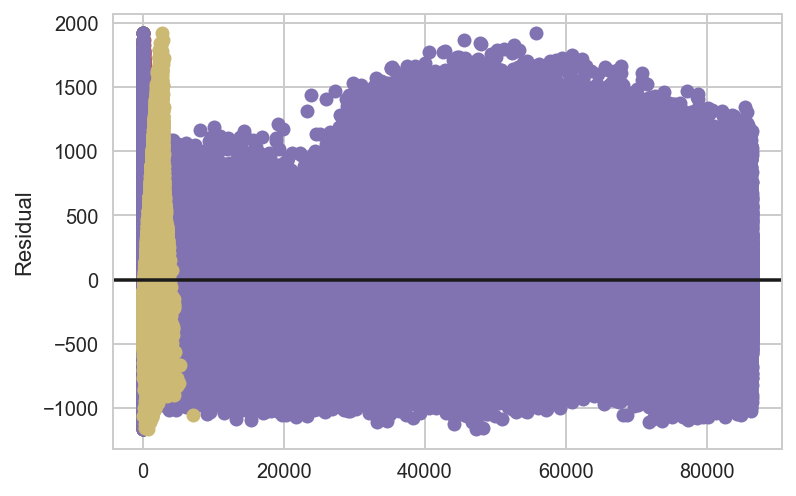

In [100]:
# x값에 따른 잔차의 분포 
plt.plot(taxi_3, result_2.resid, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.show()

## 3.3 Scaling (스케일링)

In [87]:
# Scaling을 위한 데이터 setting
taxi_3 = taxi_2
taxi_3.tail()

,Intercept,dist,pick_date,drop_time,vendor_id,passenger_count,store_and_fwd_flag,month,weekday,holiday,trip_duration
1399039,1.00,1.22,98.00,49441.00,2.00,4.00,0.00,4.00,4.00,0.00,778.00
1399040,1.00,6.05,9.00,27969.00,1.00,1.00,0.00,1.00,6.00,0.00,655.00
1399041,1.00,7.82,112.00,25824.00,2.00,1.00,0.00,4.00,4.00,0.00,764.00
1399042,1.00,1.09,4.00,57758.00,1.00,1.00,0.00,1.00,1.00,0.00,373.00
1399043,1.00,1.13,95.00,53262.00,1.00,1.00,0.00,4.00,1.00,0.00,198.00


In [88]:
# Scale 부여
feature_n_3, features_3 = get_features(taxi_3, 1, -1, scale = True)
feature_n_3, features_3

(9,
 'scale(dist) + scale(pick_date) + scale(drop_time) + scale(vendor_id) + scale(passenger_count) + scale(store_and_fwd_flag) + scale(month) + scale(weekday) + scale(holiday)')

In [89]:
# Scale data summary
model_3 =  sm.OLS.from_formula("trip_duration ~ {} ".format(features_3), data = taxi_3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                 2.656e+05
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:09:48   Log-Likelihood:            -1.0037e+07
No. Observations:             1399044   AIC:                         2.007e+07
Df Residuals:                 1399034   BIC:                         2.007e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   767.1552      0.267   2872.905      0.000     766.632     767.679
scale(dist)                 410.7915      0.267   1537.350      0.000     410.268     411.315
scale(pick_date)             17.2197      1.580     10.900      0.000      14.123      20.316
scale(drop_time)             29.1111      0.268    108.527      0.000      28.585      29.637
scale(vendor_id)             -0.2825      0.279     -1.012      0.311      -0.830       0.265
scale(passenger_count)       -1.0014      0.279     -3.591      0.000      -1.548      -0.455
scale(store_and_fwd_flag)     2.7385      0.267     10.242      0.000       2.214       3.263
scale(month)                  2.3572      1.580      1.492      0.136      -0.739       5.453
scale(weekday)              -21.6621      0.270    -80.242      0.000     -22.191     -21.133
scale(holiday)              -19.3870      0.271    -71.515      0.000     -19.918     -18.856
==============================================================================
Omnibus:                   192165.756   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           322919.533
Skew:                           0.931   Prob(JB):                         0.00
Kurtosis:                       4.440   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

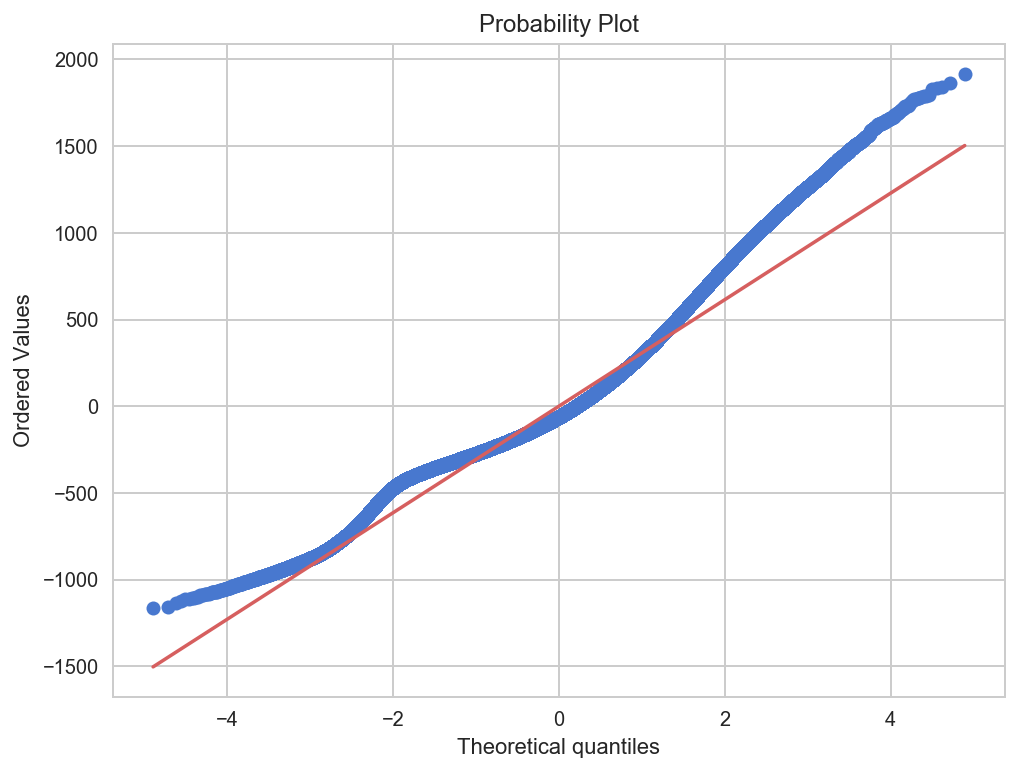

In [90]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_3.resid, plot = plt)
plt.show()

In [93]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_3.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 192165.756
P-value     :  0.000


In [94]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_3.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 322919.533
P-value     :  0.000
Skew        :  0.931
Kurtosis    :  4.440


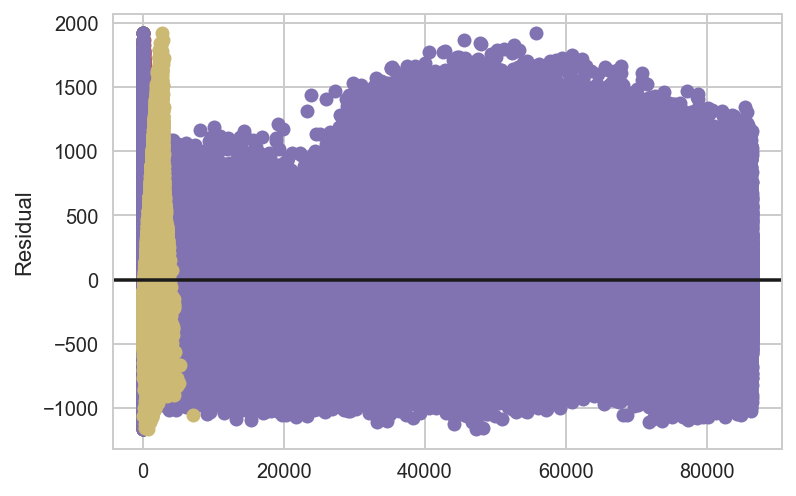

In [96]:
# x값에 따른 잔차의 분포 
plt.plot(taxi_3, result_3.resid, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.show()

## 3.4 변수변환

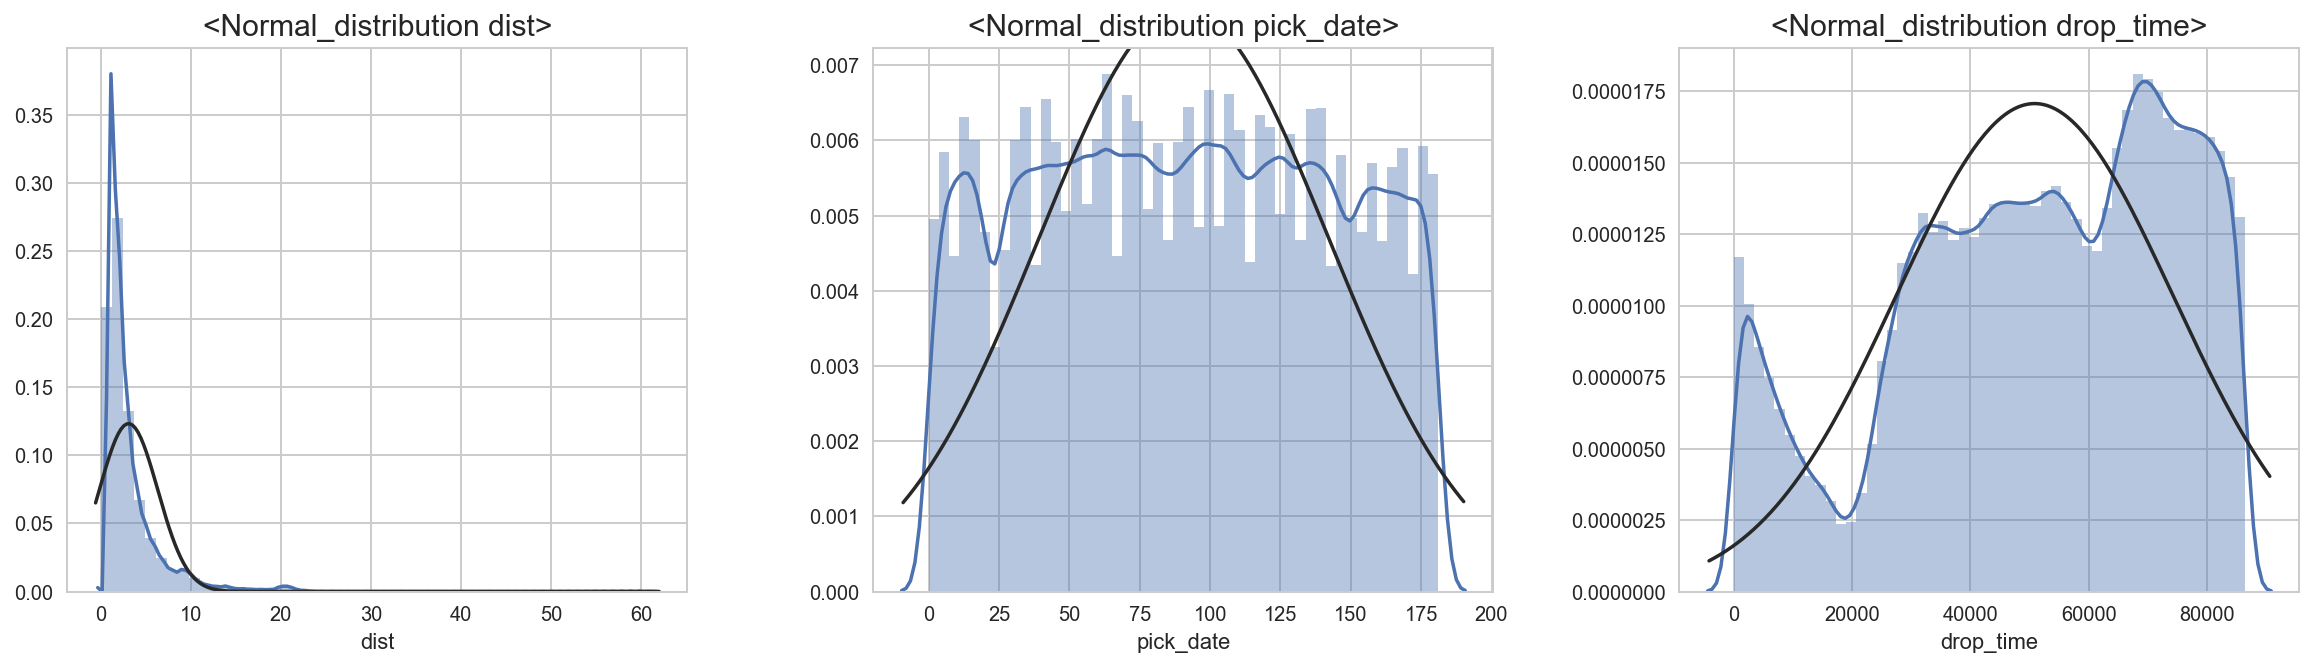

In [103]:
# 정규분포
plt.figure(figsize = (20, 5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_latitude 정규분포
plt.subplot(131)
sns.distplot(taxi_3['dist'], kde = True, fit=sp.stats.norm)
plt.title('<Normal_distribution dist>', fontsize = 15)

# dropoff_longitude 정규분포
plt.subplot(132)
sns.distplot(taxi_3['pick_date'], kde = True, fit=sp.stats.norm)
plt.title('<Normal_distribution pick_date>', fontsize = 15)

# dropoff_latitude 정규분포
plt.subplot(133)
sns.distplot(taxi_3['drop_time'], kde = True, fit=sp.stats.norm)
plt.title('<Normal_distribution drop_time>', fontsize = 15)

plt.show()

## 3.5 Multicollinearity (다중공선성)

In [104]:
taxi_4 = taxi_3.drop(['Intercept', 'trip_duration'], axis = 1)
taxi_4.corr()

,dist,pick_date,drop_time,vendor_id,passenger_count,store_and_fwd_flag,month,weekday,holiday
dist,1.00,0.01,-0.02,0.01,0.00,0.01,0.01,0.02,-0.01
pick_date,0.01,1.00,-0.01,-0.01,-0.00,-0.00,0.99,-0.01,-0.13
drop_time,-0.02,-0.01,1.00,0.01,0.01,0.00,-0.01,-0.09,-0.01
vendor_id,0.01,-0.01,0.01,1.00,0.29,-0.05,-0.01,0.00,0.00
passenger_count,0.00,-0.00,0.01,0.29,1.00,-0.01,-0.00,0.03,0.00
store_and_fwd_flag,0.01,-0.00,0.00,-0.05,-0.01,1.00,-0.00,-0.00,0.00
month,0.01,0.99,-0.01,-0.01,-0.00,-0.00,1.00,-0.01,-0.13
weekday,0.02,-0.01,-0.09,0.00,0.03,-0.00,-0.01,1.00,-0.11
holiday,-0.01,-0.13,-0.01,0.00,0.00,0.00,-0.13,-0.11,1.00


In [105]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_4.values, i) for i in range(taxi_4.shape[1])]
vif["features"] = taxi_4.columns
vif

,VIF Factor,features
0,1.85,dist
1,126.86,pick_date
2,4.64,drop_time
3,8.08,vendor_id
4,2.84,passenger_count
5,1.00,store_and_fwd_flag
6,156.87,month
7,3.09,weekday
8,1.04,holiday


In [110]:
taxi_4 = taxi_3.drop(['pick_date', 'month'], axis = 1)
taxi_4.tail()

,Intercept,dist,drop_time,vendor_id,passenger_count,store_and_fwd_flag,weekday,holiday,trip_duration
1399039,1.00,1.22,49441.00,2.00,4.00,0.00,4.00,0.00,778.00
1399040,1.00,6.05,27969.00,1.00,1.00,0.00,6.00,0.00,655.00
1399041,1.00,7.82,25824.00,2.00,1.00,0.00,4.00,0.00,764.00
1399042,1.00,1.09,57758.00,1.00,1.00,0.00,1.00,0.00,373.00
1399043,1.00,1.13,53262.00,1.00,1.00,0.00,1.00,0.00,198.00


In [111]:
feature_n_4, features_4 = get_features(taxi_4, 1, -1, scale = True)
feature_n_4, features_4

(7,
 'scale(dist) + scale(drop_time) + scale(vendor_id) + scale(passenger_count) + scale(store_and_fwd_flag) + scale(weekday) + scale(holiday)')

In [112]:
# 제거 후 결과
model_4 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_4), data = taxi_4)
result_4 = model_4.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 3.394e+05
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:22:19   Log-Likelihood:            -1.0040e+07
No. Observations:             1399044   AIC:                         2.008e+07
Df Residuals:                 1399036   BIC:                         2.008e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   767.1552      0.268   2867.523      0.000     766.631     767.680
scale(dist)                 411.0132      0.268   1535.413      0.000     410.488     411.538
scale(drop_time)             28.9267      0.269    107.643      0.000      28.400      29.453
scale(vendor_id)             -0.3964      0.280     -1.418      0.156      -0.945       0.152
scale(passenger_count)       -1.0119      0.279     -3.622      0.000      -1.560      -0.464
scale(store_and_fwd_flag)     2.6712      0.268      9.971      0.000       2.146       3.196
scale(weekday)              -22.2343      0.270    -82.246      0.000     -22.764     -21.704
scale(holiday)              -22.0416      0.269    -81.906      0.000     -22.569     -21.514
==============================================================================
Omnibus:                   196074.342   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333088.897
Skew:                           0.942   Prob(JB):                         0.00
Kurtosis:                       4.471   Cond. No.                         1.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

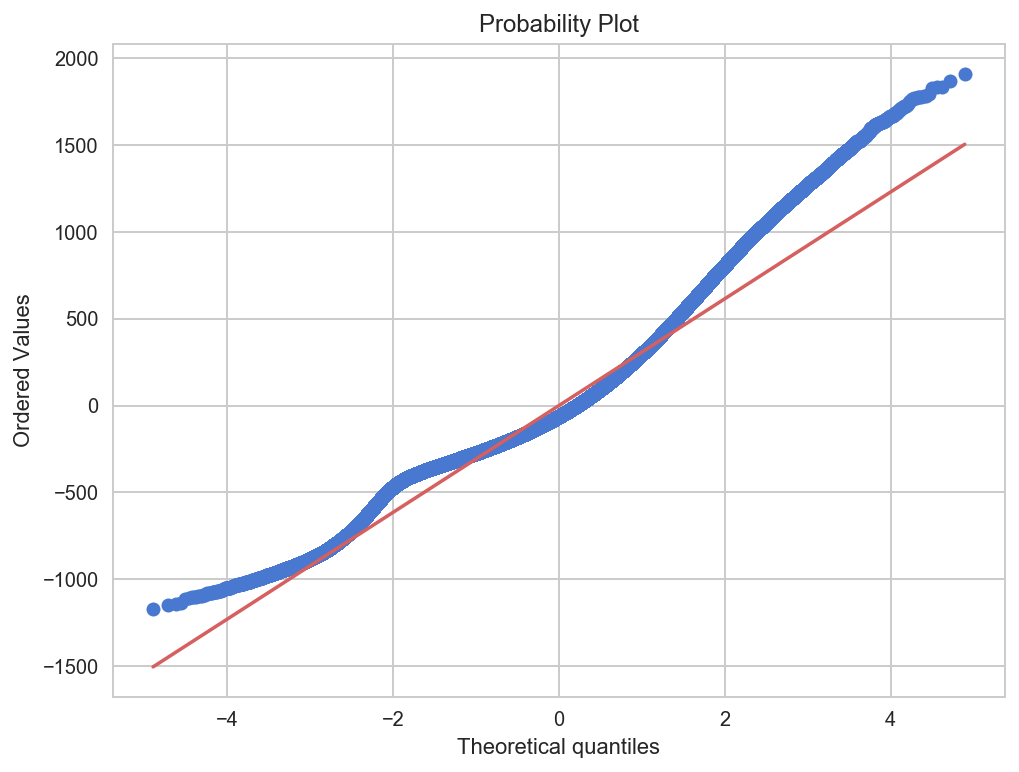

In [113]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_4.resid, plot = plt)
plt.show()

In [114]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_4.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 196074.342
P-value     :  0.000


In [115]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_4.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 333088.897
P-value     :  0.000
Skew        :  0.942
Kurtosis    :  4.471


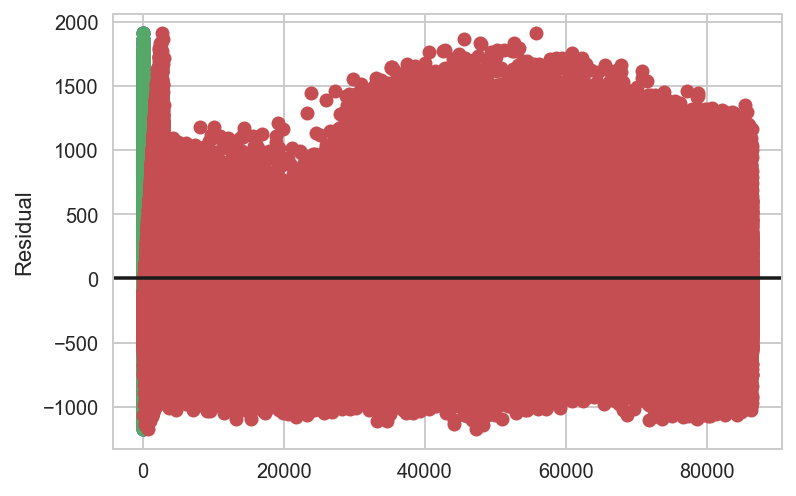

In [116]:
# x값에 따른 잔차의 분포 
plt.plot(taxi_4, result_4.resid, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.show()

---

# Modeling

---

# Cross validation

---

# Kaggle result

---

# Conclusion